In [41]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
%matplotlib inline

In [42]:
dataset = pd.read_csv('C:/Users/avgon/Desktop/GPS Trajectory/go_track_track_full.csv')
dataset.shape
dataset.describe()
dataset.info()
                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18107 entries, 0 to 18106
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              163 non-null    float64
 1   id_android      163 non-null    float64
 2   speed           163 non-null    float64
 3   time            163 non-null    float64
 4   distance        163 non-null    float64
 5   rating          163 non-null    float64
 6   rating_bus      163 non-null    float64
 7   rating_weather  163 non-null    float64
 8   car_or_bus      163 non-null    float64
 9   linha           80 non-null     object 
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  id.1            18107 non-null  object 
 14  latitude        18107 non-null  float64
 15  longitude       18107 non-null  float64
 16  track_id        18107 non-null  int64  
 17  time.1          18107 non-null 

dataset.plot(x='speed', y='time', style='o')  
plt.title('Speed vs Time')  
plt.xlabel('Speed')  
plt.ylabel('Time')  
plt.show()

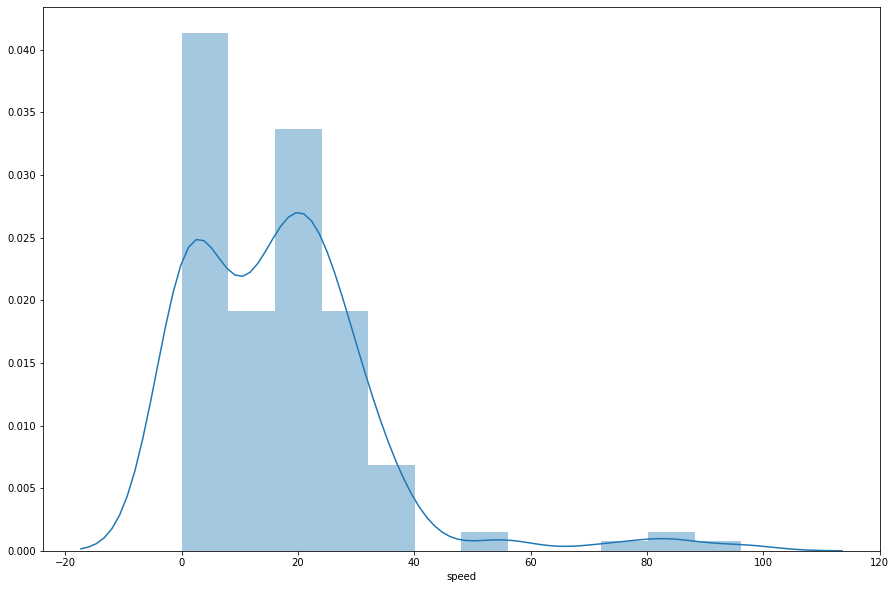

In [38]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['speed'])

In [43]:
#divide the data into “attributes” and “labels”
X = dataset['speed'].values.reshape(-1,1)
y = dataset['time'].values.reshape(-1,1)

#split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
#predictions of data
y_pred = regressor.predict(X_test)

#compare actual values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

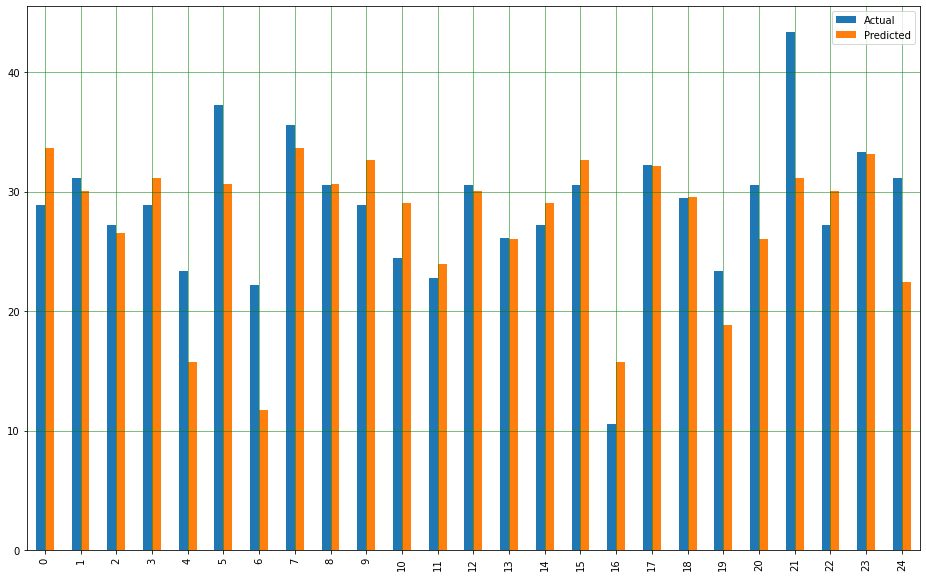

In [26]:
#visualize comparison result
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3622, 1) and (23808, 1)

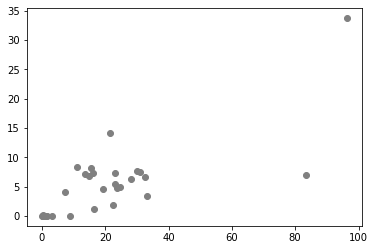

In [27]:
#plot straight line with test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
#evalutaion of performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

A simple linear regression was implemented. However, due to the fact that an error occured(ValueError: Input contains NaN, infinity or a value too large for dtype('float64'), further analysis became more complicated. Solution wasn't yet found.
